# Imorting Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Environment set-up

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# Loading the Bank-additional-full dataset

In [3]:
data= pd.read_csv('bank-additional-full.csv', delimiter= ';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# Data Overview

In [13]:
exp= data.shape # Number of rows and columns
print(f"Number of rows: {exp[0]}\nNumber of columns: {exp[1]}")      

Number of rows: 41188
Number of columns: 21


In [7]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data_desc= data.describe() # data description
data_desc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Checking for null values in all columns

Text(0.5, 1.0, 'Null values')

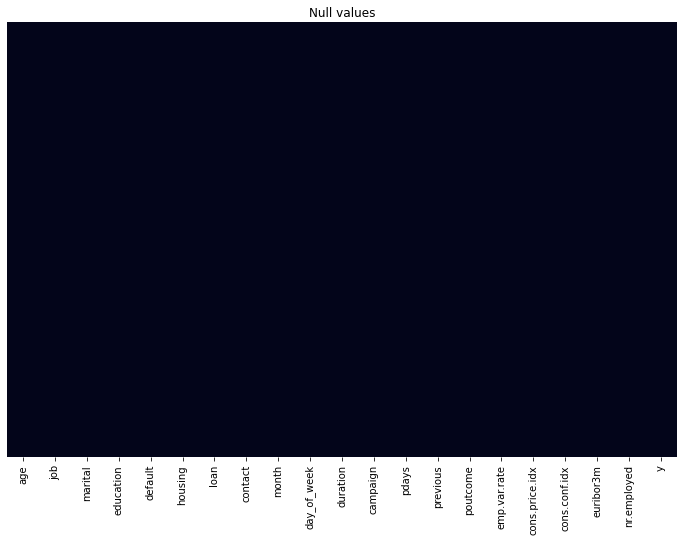

In [9]:
plt.figure(figsize= (12, 8))
sns.heatmap(data.isna(), cbar= False, yticklabels= False).set_title('Null values')

#### It could be noticed that there is no null value in all the columns, even if it exist that means they were represented with 'Unknown'

# Data correlation

In [38]:
corre= data.corr() # Correlation of the numerical column
corre

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Text(0.5, 1.0, 'Data correlation')

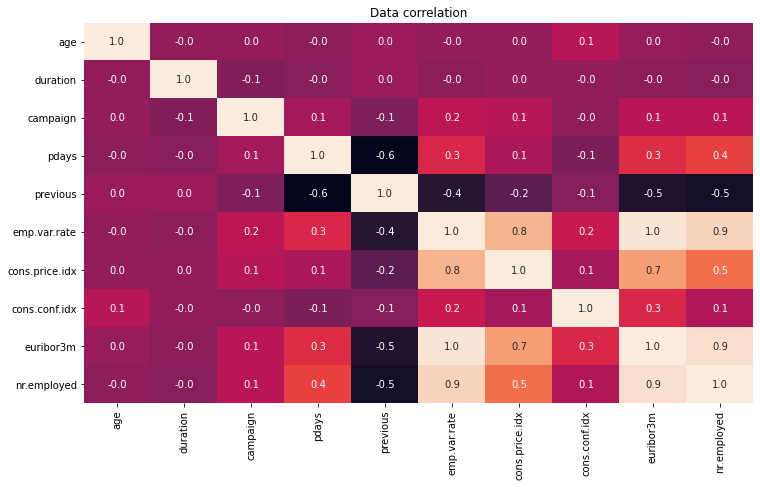

In [41]:
plt.figure(figsize = (12, 7))
sns.heatmap(corre, cbar=False, annot=True, fmt='.1f').set_title('Data correlation')

# Univariate analysis

* ## Age and Duration distribution

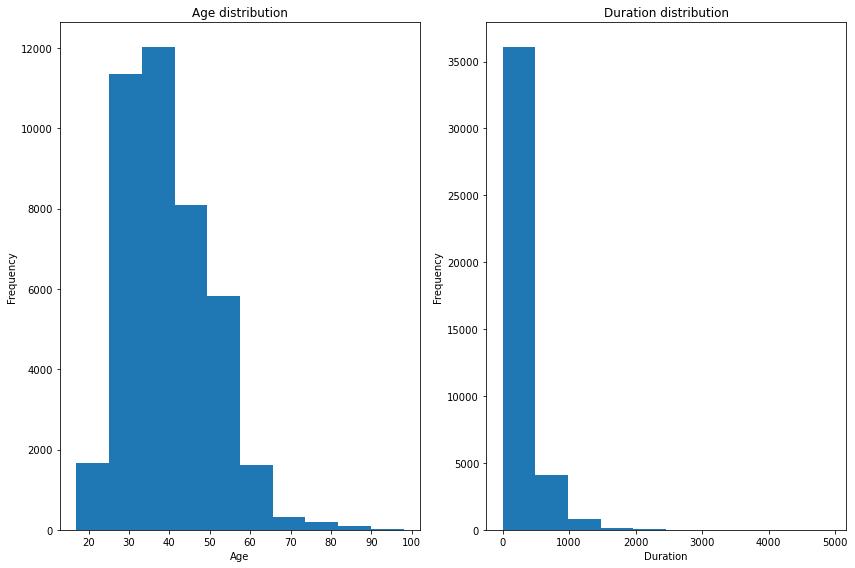

In [31]:
fig, axis= plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
data['age'].plot.hist(ax= axis[0]).set(xlabel= 'Age', title= 'Age distribution')
data['duration'].plot.hist(ax= axis[1]).set(xlabel= 'Duration', title= 'Duration distribution')
plt.tight_layout()
plt.close(fig)
fig

In [11]:
data.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### From the above description of the data, we observe that the mean age is  40 years with a maximum age of  98 years and minimum age of 17  years. While the distribution of the duration mean is 41 with the standard deviation of 258 and the upper quartile, min are 319, 180 respectively.

In [16]:
def count_on(on):
    viz= sns.countplot(data[on],  palette= 'coolwarm')
    viz.set(title= f'Count of {on}', xlabel= f'{on}')

### Checking if the Target variable is balance

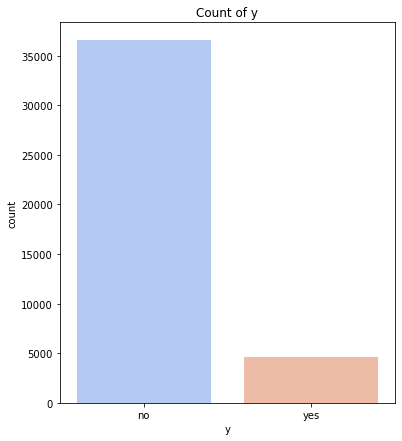

In [22]:
plt.figure(figsize= (6, 7))
count_on('y')

<h4> It could be observe from above visualization that lot of customers has not subscribed to the term deposit</h4>

### Marital

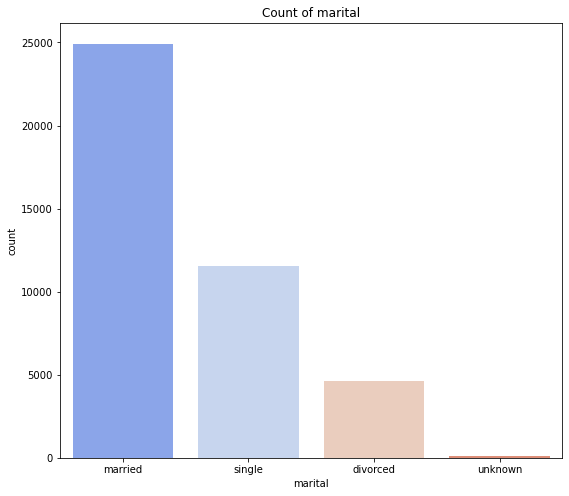

In [20]:
plt.figure(figsize= (9, 8))
count_on('marital')

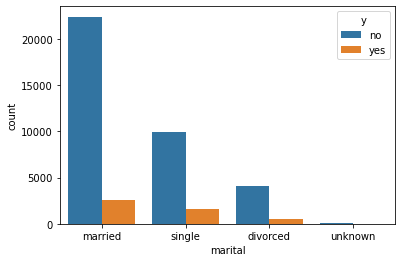

In [23]:
sns.countplot(x= 'marital', data= data, hue= 'y')

#### It could be noticed that most of the married people did not subscribe to the term deposite

## Education

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


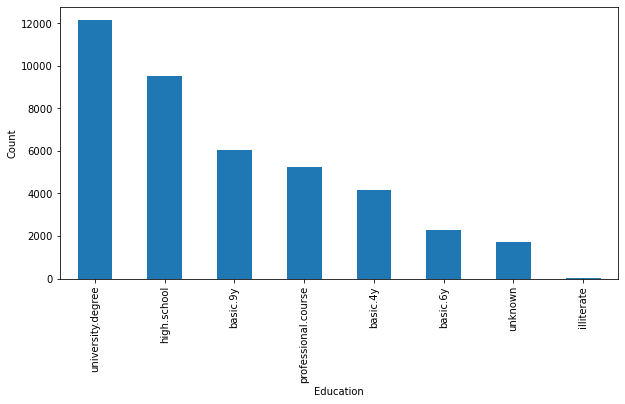

In [29]:
ed= data['education'].value_counts()# this is the count of the education
print(ed)
plt.figure(figsize=(10,5))
ed.plot.bar().set(ylabel= 'Count', xlabel= "Education");

## Job

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


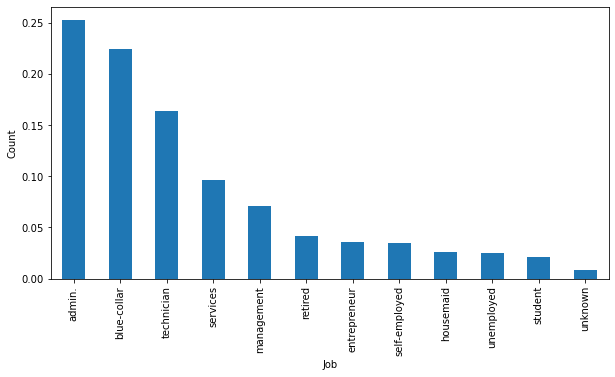

In [30]:
print(data['job'].value_counts())
plt.figure(figsize=(10,5))
data['job'].value_counts(normalize=True).plot(kind='bar').set(ylabel= "Count", xlabel= "Job");

# Bivariate Analysis

In [33]:
def visual_boxplot(x, y, hue):
    plot = sns.boxplot(x= x, y=y, hue=hue, data= data)
    plt.xticks( rotation=45, horizontalalignment='right' )
    plot.set_title(f'Box plot of {x.capitalize()} and {y.capitalize()}')

## Education VS Age and Target

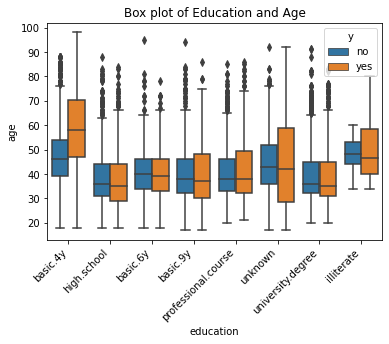

In [37]:
visual_boxplot("education", "age", hue= "y")

## Marital VS Age & Target

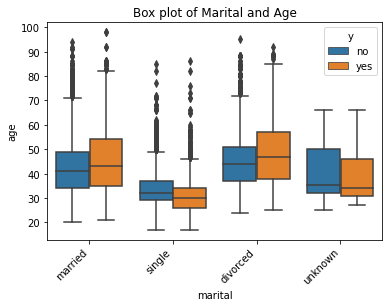

In [36]:
visual_boxplot("marital", "age",hue= "y")

## Outcome of previous marketing campaign

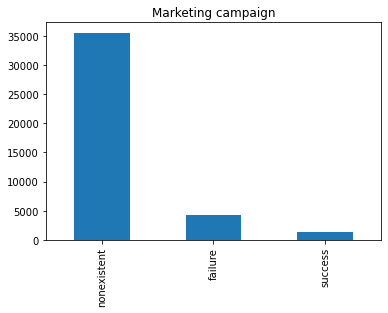

In [47]:
data['poutcome'].value_counts().plot.bar().set_title('Marketing campaign');

# Preprocessing

### Using label Encoder to transform the categorical columns

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

Scaling process

In [48]:
data['housing'] = le.fit_transform(data["housing"])
data['loan'] = le.fit_transform(data["loan"])
data["job"] = le.fit_transform(data["job"])
data['month'] = le.fit_transform(data["month"])
data['poutcome'] = le.fit_transform(data["poutcome"])
data['education'] = le.fit_transform(data["education"])
data["marital"] = le.fit_transform(data["marital"])
data['default'] = le.fit_transform(data["default"])
data['contact'] = le.fit_transform(data["contact"])
data['day_of_week'] = le.fit_transform(data["day_of_week"])
data['y'] = le.fit_transform(data["y"])

### Rescaling numerical columns with StandardScaler

In [50]:
st = StandardScaler()
# This is the columns which am going to rescale usng standardscaler
scaling_col = ['emp.var.rate',"pdays","age", 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

In [51]:
data[scaling_col] = st.fit_transform(data[scaling_col])

### Visualizing data after scaling

In [52]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,0,1,6,1,261,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,7,1,3,1,0,0,1,6,1,149,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,7,1,3,0,2,0,1,6,1,226,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,0,1,1,0,0,0,1,6,1,151,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,7,1,3,0,0,2,1,6,1,307,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
5,0.477486,7,1,2,1,0,0,1,6,1,198,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
6,1.820911,0,1,5,0,0,0,1,6,1,139,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
7,0.093650,1,1,7,1,0,0,1,6,1,217,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
8,-1.537652,9,2,5,0,2,0,1,6,1,380,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
9,-1.441693,7,2,3,0,2,0,1,6,1,50,1,0.195414,0,1,0.648092,0.722722,0.886447,0.71246,0.33168,0


In [53]:
target= data['y'] # The target variable
train_d = data.drop(columns= ['duration', 'y']) # This will be my independent variables

In [55]:
print(f"\tTarget\nrows: {target.shape[0]}\n\tIndependent variable\nrows: {train_d.shape[0]}\nColumns: {train_d.shape[1]}")

	Target
rows: 41188
	Independent variable
rows: 41188
Columns: 19


## Splitting data using train test split

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(train_d,target,test_size=0.2)

In [58]:
print(f'X train shape: {X_train.shape}\nY train shape: {y_train.shape}\nX test shape: {X_test.shape}\nY test shape: {y_test.shape}')

X train shape: (32950, 19)
Y train shape: (32950,)
X test shape: (8238, 19)
Y test shape: (8238,)


# Machine learning

* ## Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rd= RandomForestClassifier(n_estimators=15) # Random forest model
rd.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
rd_pred= rd.predict(X_test)
print(f'Random forest classifier accuracy score: {rd.score(X_test, y_test)}')

Random forest classifier accuracy score: 0.8903860160233066


* ## Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [73]:
log= LogisticRegression(solver="newton-cg") # logistic model
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
log_pred = log.predict(X_test)
print(f'Logistic regression accuracy score: {log.score(X_test, y_test)}')

Logistic regression accuracy score: 0.8964554503520272


* ## Decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier() # Decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
dt_pred= dt.predict(X_test)
print(f'Decision tree accuracy score: {dt.score(X_test, y_test)}')

Decision tree accuracy score: 0.8324836125273124
